In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def predict_category(s, m, t):
    pred = m.predict([s])
    return t[pred[0]]

In [4]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')
print (train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
categories = ['rec.autos', 'rec.motorcycles','sci.space', 'sci.med']
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [6]:
print ('data subset:')    
print (train.target.shape, 'shape of train data')
print (test.target.shape, 'shape of test data')

data subset:
(2379,) shape of train data
(1584,) shape of test data


In [7]:
targets = train.target_names
mnb_clf = make_pipeline(TfidfVectorizer(), MultinomialNB())
mnb_clf.fit(train.data, train.target)
labels = mnb_clf.predict(test.data)
f1 = f1_score(test.target, labels, average='micro')
cm = confusion_matrix(test.target, labels)


Pipeline
f1_score 0.9621212121212122 



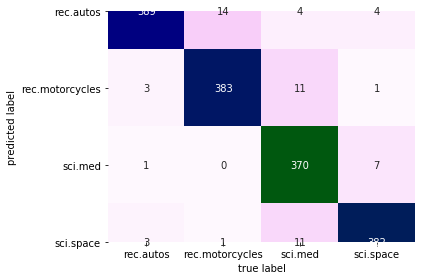

In [11]:
print (mnb_clf.__class__.__name__)
print ('f1_score', f1, br)
plt.figure('confusion matrix')
sns.heatmap(cm.T, square=True, annot=True, fmt='d',cmap='gist_ncar_r',
            xticklabels=train.target_names,
            yticklabels=train.target_names, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.tight_layout()

In [12]:
print ('sci.med predictions:')
print (cm.T[2][2], 'correct predictions')
print (cm.T[2][0], 'misclassified as rec.autos')
print (cm.T[2][3], 'misclassified as sci.space')

sci.med predictions:
370 correct predictions
1 misclassified as rec.autos
7 misclassified as sci.space


In [14]:
y_pred = predict_category('payload on the mars rover',mnb_clf, targets)
print (y_pred)
y_pred = predict_category('car broke down on the highway',mnb_clf, targets)
print (y_pred)
y_pred = predict_category('dad died of cancer', mnb_clf,targets)
print (y_pred)

sci.space
rec.autos
sci.med
